In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Importing datasets

In [ ]:

train=pd.read_csv('exoTrain.csv')
test=pd.read_csv('exoTest.csv')


# Reshaping the datasets

In [3]:
X_train = np.transpose(np.array(train[train.columns[1:]]))
Y_train = np.reshape(np.array(train['LABEL']),(1,train.shape[0]))

X_test = np.transpose(np.array(test[test.columns[1:]]))
Y_test = np.reshape(np.array(test['LABEL']),(1,test.shape[0]))

In [4]:
print('X_train :',X_train.shape)
print('Y_train :',Y_train.shape)

print('X_test :',X_test.shape)
print('Y_test :',Y_test.shape)

X_train : (3197, 5087)
Y_train : (1, 5087)
X_test : (3197, 570)
Y_test : (1, 570)


# Normalization of datasets

In [5]:
# Normalization of both train and test set X:

#training set:
mean_train = np.reshape(np.mean(X_train,axis=0),(1,X_train.shape[1]))
std_train = np.reshape(np.std(X_train,axis=0),(1,X_train.shape[1]))
X_train = (X_train - mean_train)/std_train

#test set:
mean_test = np.reshape(np.mean(X_test,axis=0),(1,X_test.shape[1]))
std_test = np.reshape(np.std(X_test,axis=0),(1,X_test.shape[1]))
X_test = (X_test - mean_test)/std_test

In [6]:
X_train

array([[ 0.52205598, -0.52418682,  1.86086099, ...,  4.40733518,
         0.27498946,  5.16248093],
       [ 0.45958061, -0.44002245,  1.87249912, ...,  4.48246107,
         0.11730004,  4.88787124],
       [ 0.06313585, -0.85184454,  1.79376438, ...,  4.21732046,
        -0.37308671,  4.67363673],
       ...,
       [ 0.32025558,  0.23145922, -0.13163528, ...,  1.39301064,
        -1.39943518, -0.35568069],
       [-0.03032828,  0.39045488, -0.27750212, ...,  1.24064034,
        -0.65747456, -0.31299609],
       [-0.30798274,  0.45595309, -0.37206186, ...,  1.24650701,
        -0.30563574,  0.36719848]])

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def derivatives_sigmoid(z):
    return z * (1 - z)

# Defining Neural Network Architecture

In [8]:
#Defining neural network architecture
n_x = X_train.shape[0]
n_h=1000
n_y=1

# Initializing the parameters

In [9]:
#Initializing parameters

def initialize_parameters(n_x,n_h,n_y):
    
    w1 = np.random.randn(n_h,n_x)
    b1 = np.zeros((n_h,1))
    
    w2 = np.random.randn(n_y,n_h)
    b2 = np.zeros((n_y,1))
    
    parameters = {'w1':w1,
                  'b1':b1,
                   'w2':w2,
                   'b2':b2}
    return parameters

In [10]:
parameters = initialize_parameters(n_x,n_h,n_y)
print('w1 :',parameters['w1'])
print('b1 :',parameters['b1'])
print('w2 :',parameters['w2'])
print('b2 :',parameters['b2'])

w1 : [[ 0.4659968   0.19823092 -1.5476554  ... -1.6133723   0.06026283
   2.04447401]
 [ 0.65215552  0.84866643 -0.37446561 ...  0.87335503  3.04639645
  -1.19857495]
 [-1.112147    0.32198989 -1.31804449 ... -0.65426453 -0.03978439
  -0.91405698]
 ...
 [ 2.0024996  -0.36263235  0.28814151 ...  2.21618992 -0.94134403
   0.18103084]
 [-0.25332956  0.45316131 -1.12429096 ... -0.05960403 -0.85022389
   0.16523537]
 [-0.6973531  -0.24953447  1.96736681 ...  2.30634858  2.03480509
   0.25633559]]
b1 : [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


# Forward Propagation 

In [11]:
def forward_propagation(X,Y,parameters):
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    
    Z1 = np.dot(w1,X) +b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(w2,A1) +b2
    A2= np.tanh(Z2)
    A2 = sigmoid(Z2)
    A2 = np.abs(A2 - 0.0001)
   
    
    
    cache = {'Z1':Z1,
            'A1':A1,
            'Z2':Z2,
            'A2':A2}
    
    return A2, cache

In [12]:
A2 ,cache = forward_propagation(X_train,Y_train,parameters)
#print('Z1 :',cache['Z1'])
#print('A1 :',cache['A1'])
#print('Z2 :',cache['Z2'])
print('A2 :',cache['A2'])

A2 : [[9.94716749e-01 9.99900000e-01 9.89350333e-05 ... 1.00000000e-04
  9.99899407e-01 9.99900000e-01]]


In [13]:
forward_propagation(X_train,Y_train,parameters)

(array([[9.94716749e-01, 9.99900000e-01, 9.89350333e-05, ...,
         1.00000000e-04, 9.99899407e-01, 9.99900000e-01]]),
 {'Z1': array([[ -27.58758569,   -9.26961498,    3.19846485, ...,  -33.55676079,
            19.32995071,   14.4061332 ],
         [ -61.05742071,   72.93731069,   15.77953858, ...,   56.49906175,
            -1.9558103 ,  -25.22377685],
         [ -57.52781641,  -44.26415604,    7.19218986, ...,  -53.0648056 ,
            33.05226609,  -23.94097859],
         ...,
         [  37.55785324,   27.72668997,   44.40513246, ..., -115.82517057,
           -61.2771842 ,  -12.60703451],
         [  24.20501761,   35.30115087,  -29.85870485, ..., -107.53823374,
           -44.05887138,   12.82339717],
         [  33.4510572 ,    1.6150678 ,   49.25063996, ...,   58.1884088 ,
           -12.54890795,   64.60106908]]),
  'A1': array([[-1.        , -0.99999998,  0.99667221, ..., -1.        ,
           1.        ,  1.        ],
         [-1.        ,  1.        ,  1.        , .

In [14]:
m=Y_train.shape[1]


# Defining Cost Function

In [15]:
def compute_cost(output_activation,Y):
    n = Y.shape[1]
    cost = -(np.dot(Y,np.transpose(np.log(output_activation))) + np.dot((1-Y),np.transpose(np.log(1-output_activation))))/n
    cost = np.squeeze(cost)
    return cost

In [16]:
cost=compute_cost(A2,Y_train)
print(cost)

4.645387899938281


# Backward Propagation

In [17]:
def backward_propagation(parameters , cache , X,Y):
    w1 = parameters['w1']
    w2 = parameters['w2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 -Y
    dW2 = 1/m * (np.dot(dZ2,A1.T))
    db2 = 1/m * (np.sum(dZ2,axis=1,keepdims=True))
    
    dZ1 = np.dot(w2.T,dZ2)*(1-np.power(np.tanh(A1),2))
    dW1 = 1/m * (np.dot(dZ1, X.T))
    db1 = 1/m * (np.sum(dZ1, axis=1 , keepdims = True))
    
    grads = {'dW1':dW1,
            'db1':db1,
            'dW2':dW2,
            'db2':db2}
    
    return grads

In [18]:
grads = backward_propagation(parameters, cache, X_train, Y_train)
print ("dW1 = "+ str(grads["dW1"].shape))
print ("db1 = "+ str(grads["db1"].shape))
print ("dW2 = "+ str(grads["dW2"].shape))
print ("db2 = "+ str(grads["db2"].shape))

dW1 = (1000, 3197)
db1 = (1000, 1)
dW2 = (1, 1000)
db2 = (1, 1)


# Updating Parameters

In [19]:
def update_parameters(parameters , grads , learning_rate):
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    
    dW1=grads['dW1']
    dW2=grads['dW2']
    db1=grads['db1']
    db2=grads['db2']
    
    w1 = w1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters={'w1':w1,
               'w2':w2,
               'b1':b1,
               'b2':b2}
    return parameters
    

In [20]:
parameters = update_parameters(parameters, grads, 0.1)

#print("w1 = " + str(parameters["w1"]))
#print("b1 = " + str(parameters["b1"]))
#print("w2 = " + str(parameters["w2"]))
#print("b2 = " + str(parameters["b2"]))

# Integrating into a neural network model

In [23]:
def model(X,Y,learning_rate,epochs=3000):
    np.random.seed(3)
    n_x = X_train.shape[0]
    n_h=1000
    n_y=1
    
    parameters = initialize_parameters(n_x, n_h,n_y)
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    all_cost = list()
    all_accuracy = list()
    
    for i in range(epochs):
        A2, cache = forward_propagation(X, Y,parameters)
        cost = compute_cost(A2,Y)
        all_cost.append(cost)
        print("Cost for iteration ",i+1," = ",cost,end='\r')
        
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads , learning_rate)
        accuracy = np.squeeze(A2)
        accuracy = (100 - np.mean(np.abs(accuracy - Y))*100)
        all_accuracy.append(accuracy)
        
    model = {}
    model["grads"]=grads
    model["cache"]=cache
    model["parameters"]=parameters
    model["cost"]=all_cost
    model["accuracy"] = all_accuracy  
    
    return model
        
        

In [24]:
model_train = model(X_train,Y_train,0.1)

# Training set Accuracy is over 98.0218708902689 %

In [25]:

train_prediction = np.squeeze(model_train["cache"]["A2"])
print("Training set accuracy = ",(100 - np.mean(np.abs(train_prediction - Y_train))*100))

Training set accuracy =  98.0218708902689


In [26]:
model_test = model(X_test,Y_test,0.1)

# Test set Accuracy is 98.09477226306261 %

In [27]:
test_prediction = np.squeeze(model_test["cache"]["A2"])
print("Test set accuracy = ",(100 - np.mean(np.abs(test_prediction - Y_test))*100))

Test set accuracy =  98.09477226306261


## The model works well on test set

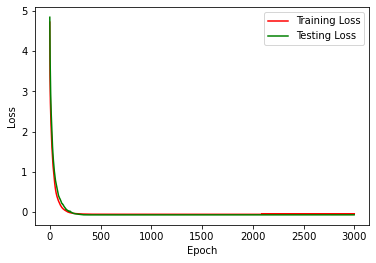

In [28]:
cost_train = np.squeeze(model_train["cost"])
cost_test = np.squeeze(model_test["cost"])

train, = plt.plot(cost_train,label='Training Loss',color='red')
test, = plt.plot(cost_test,label='Testing Loss',color='green')

plt.legend(handles=[train,test])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

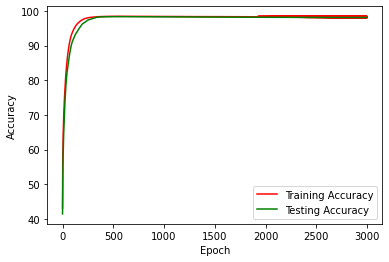

In [29]:
accuracy_train = np.squeeze(model_train["accuracy"])
accuracy_test = np.squeeze(model_test["accuracy"])

train, = plt.plot(accuracy_train,label='Training Accuracy',color='red')
test, = plt.plot(accuracy_test,label='Testing Accuracy',color='green')

plt.legend(handles=[train,test])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()